<a href="https://colab.research.google.com/github/azelia-choi/ITB2022/blob/main/%5B1914114_%EC%B5%9C%EA%B0%80%EC%9D%80%5D_%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#맥북 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


### 주제 : '성별코드', '연령대','신장','체중','허리둘레','흡연상태','음주여부','총콜레스테롤','공복혈당' 컬럼이 비만 여부에 미치는 영향 탐구

#Part1. 데이터 불러오기💻

# (1) 흥미로운 분류 문제 선정: 종속/독립 변수 선택 
   - 수치 데이터를 범주형으로 변경 가능 (예. 이진 클래스로 변경: 0.5 이상 Y, 0.5 미만 N)
   - 건강검진 데이터에 다른 외부 데이터를 연결해서 이용도 가능
   - 필요한 경우 데이터 전처리 및 파생변수 생성 

# (2) 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과 
   - 적절한 평가 방법 1개 선택 
   - 분류 모델의 종류는 3개 이하로 선택, 수업시간에 배우지 않은 분류 모델도 사용 가능 

# (3) 분류 모델을 통한 인사이트 도출:  중요 변수 설명 등  
# (4) 코드는 github에 올리고 주소 제출

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")

In [ ]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 10.4 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=7427a00c13e5f911c0c0787ac64f75f371cb7b0f463e710ad87e1629a1972e6a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 7.4 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [ ]:
#필요한 라이브러리 import
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import mglearn

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

# Part2. 전처리👀

In [ ]:
#원본데이터 df로 복제
df = data.copy()
print(df.shape)

(10000, 31)


In [ ]:
display(df.head()) 
print(df.info()) 
print(df.describe()) 

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [ ]:
#describe 함수로 살펴보기
df.describe().style.background_gradient(cmap = "summer")

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9912.000000,9912.000000,9912.000000,4044.000000,4044.000000,4044.000000,3977.000000,9912.000000,9861.000000,9912.000000,9912.000000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.000000,5000.500000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,1.045200,124.669693,76.789750,103.777542,198.269041,132.801434,56.158309,116.263264,14.214255,1.119461,0.848484,27.589790,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.000000,2886.895680,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,0.218545,14.629865,9.931527,24.649816,41.945872,92.919969,14.484780,37.829955,1.555386,0.489782,0.301012,17.884420,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.000000,1.000000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,77.000000,40.000000,55.000000,70.000000,14.000000,19.000000,13.000000,5.100000,1.000000,0.050000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.000000,2500.750000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,115.000000,70.000000,91.000000,169.000000,77.000000,46.000000,89.000000,13.200000,1.000000,0.700000,20.000000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.000000,5000.500000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,124.000000,77.000000,99.000000,197.000000,111.000000,54.000000,115.000000,14.200000,1.000000,0.800000,24.000000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.000000,7500.250000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,1.000000,134.000000,83.000000,109.000000,225.000000,160.000000,65.000000,141.000000,15.300000,1.000000,1.000000,30.000000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.000000,10000.000000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,3.000000,200.000000,130.000000,473.000000,387.000000,1701.000000,125.000000,297.000000,20.000000,6.000000,9.200000,692.000000,1146.000000,2322.000000,1.000000,1.000000,2.000000


In [ ]:
#결측치 있는 데이터 알아보기
df.info(verbose=True, show_counts=True)

#결측치 있는 데이터
#수축기혈압, 이완기혈압, 식전혈당(공복혈당),(혈청지오티)AST ,(혈청지오티)AST,(혈청지오티)ALT, 감마지티피: 9912개
#총콜레스테롤, 트리슬리세라이드, HDLzhffptmxpfhf : 4044개 등등 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [ ]:
#데이터를 다루기 용이하도록 컬럼명 변경

# 신장(5Cm단위) -> 신장
# 체중(5Kg 단위) -> 체중
# 연령대코드(5세단위) -> 연령대코드
# 식전혈당(공복혈당) -> 공복혈당

df.rename(columns={'신장(5Cm단위)': '신장', '체중(5Kg 단위)': '체중','연령대코드(5세단위)' : '연령대', '식전혈당(공복혈당)' : '공복혈당', }, inplace=True)

### 음주 및 흡연과 비만율(BMI)과의 상관관계 알아보기위해 데이터프레임(df_1) 만들기

In [ ]:
#결측치있는 행 제거 
##흡연상태에 2개의 결측치, 음주여부에 1개의 결측치가 있음

df.info()

df_1= df.drop(['기준년도','가입자일련번호','구강검진수검여부','데이터공개일자'],axis=1)

df_1 = df_1.dropna(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준년도        10000 non-null  int64  
 1   가입자일련번호     10000 non-null  int64  
 2   시도코드        10000 non-null  int64  
 3   성별코드        10000 non-null  object 
 4   연령대         10000 non-null  int64  
 5   신장          10000 non-null  int64  
 6   체중          10000 non-null  int64  
 7   허리둘레        10000 non-null  float64
 8   시력(좌)       10000 non-null  float64
 9   시력(우)       10000 non-null  float64
 10  청력(좌)       10000 non-null  int64  
 11  청력(우)       10000 non-null  int64  
 12  수축기혈압       9912 non-null   float64
 13  이완기혈압       9912 non-null   float64
 14  공복혈당        9912 non-null   float64
 15  총콜레스테롤      4044 non-null   float64
 16  트리글리세라이드    4044 non-null   float64
 17  HDL콜레스테롤    4044 non-null   float64
 18  LDL콜레스테롤    3977 non-null   float64
 19  혈색소         9912 non-null 

In [ ]:
#1249개의 데이터를 활용하여 분석
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도코드        1249 non-null   int64  
 1   성별코드        1249 non-null   object 
 2   연령대         1249 non-null   int64  
 3   신장          1249 non-null   int64  
 4   체중          1249 non-null   int64  
 5   허리둘레        1249 non-null   float64
 6   시력(좌)       1249 non-null   float64
 7   시력(우)       1249 non-null   float64
 8   청력(좌)       1249 non-null   int64  
 9   청력(우)       1249 non-null   int64  
 10  수축기혈압       1249 non-null   float64
 11  이완기혈압       1249 non-null   float64
 12  공복혈당        1249 non-null   float64
 13  총콜레스테롤      1249 non-null   float64
 14  트리글리세라이드    1249 non-null   float64
 15  HDL콜레스테롤    1249 non-null   float64
 16  LDL콜레스테롤    1249 non-null   float64
 17  혈색소         1249 non-null   float64
 18  요단백         1249 non-null   float64
 19  혈청크레아티닌     1249 non-null  

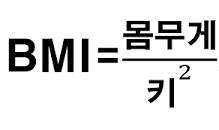

In [ ]:
#음주 및 흡연과 비만율(BMI)과의 상관관계 알아보기위해 BMI 열 새로 만들기

df_1['BMI'] = df_1['체중'] /  (df_1['신장'] *  df_1['신장']) * 10000

In [ ]:
#잘 생성되었는지 확인
df_1.head()

,시도코드,성별코드,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석,BMI
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,1.0,0.7,18.0,20.0,35.0,Yes,Yes,0.0,1.0,29.384757
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,1.0,29.0,54.0,24.0,No,Yes,0.0,1.0,25.390625
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,1.0,0.8,24.0,14.0,12.0,No,No,0.0,0.0,20.811655
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.0,1.4,33.0,22.0,29.0,No,Yes,0.0,0.0,24.973985
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,1.0,28.0,20.0,43.0,No,Yes,0.0,0.0,23.875115


![image.png](
  
)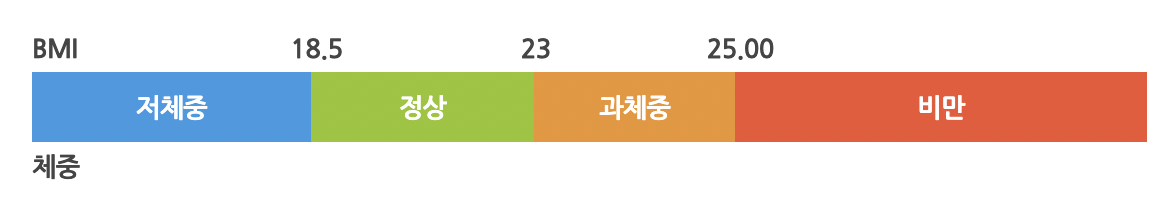

### https://health.seoulmc.or.kr/healthCareInfo/myBMIPopup.do

In [ ]:
#BMI지수에 따른 비만정도 알아보기 위해 grades 열 추가

grades = []
for row in df_1['BMI'] : 
  if row <= 23:
    grades.append('NotFat')
  else:
    grades.append('Fat')

df_1['grades'] = grades

In [ ]:
#잘 생성되었는지 확인
df_1.head()

,시도코드,성별코드,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석,BMI,grades
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,0.7,18.0,20.0,35.0,Yes,Yes,0.0,1.0,29.384757,Fat
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,29.0,54.0,24.0,No,Yes,0.0,1.0,25.390625,Fat
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,0.8,24.0,14.0,12.0,No,No,0.0,0.0,20.811655,NotFat
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.4,33.0,22.0,29.0,No,Yes,0.0,0.0,24.973985,Fat
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,28.0,20.0,43.0,No,Yes,0.0,0.0,23.875115,Fat


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도코드        1249 non-null   int64  
 1   성별코드        1249 non-null   object 
 2   연령대         1249 non-null   int64  
 3   신장          1249 non-null   int64  
 4   체중          1249 non-null   int64  
 5   허리둘레        1249 non-null   float64
 6   시력(좌)       1249 non-null   float64
 7   시력(우)       1249 non-null   float64
 8   청력(좌)       1249 non-null   int64  
 9   청력(우)       1249 non-null   int64  
 10  수축기혈압       1249 non-null   float64
 11  이완기혈압       1249 non-null   float64
 12  공복혈당        1249 non-null   float64
 13  총콜레스테롤      1249 non-null   float64
 14  트리글리세라이드    1249 non-null   float64
 15  HDL콜레스테롤    1249 non-null   float64
 16  LDL콜레스테롤    1249 non-null   float64
 17  혈색소         1249 non-null   float64
 18  요단백         1249 non-null   float64
 19  혈청크레아티닌     1249 non-null  

In [ ]:
#grades에 너무 직접적인 영향을 주는 BMI 열은 삭제
df_2 = df_1.drop(['BMI'], axis=1)

In [ ]:
df_2

,시도코드,성별코드,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석,grades
6,44,M,9,165,80,93.0,0.8,0.7,1,2,...,1.0,0.7,18.0,20.0,35.0,Yes,Yes,0.0,1.0,Fat
16,30,M,11,160,65,90.0,0.6,0.6,1,1,...,1.0,1.0,29.0,54.0,24.0,No,Yes,0.0,1.0,Fat
21,41,F,11,155,50,65.9,0.7,1.0,1,1,...,1.0,0.8,24.0,14.0,12.0,No,No,0.0,0.0,NotFat
27,11,M,17,155,60,82.0,0.5,0.7,1,1,...,1.0,1.4,33.0,22.0,29.0,No,Yes,0.0,0.0,Fat
47,26,M,16,165,65,94.0,1.5,0.6,2,2,...,1.0,1.0,28.0,20.0,43.0,No,Yes,0.0,0.0,Fat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,30,M,9,180,70,87.5,1.2,0.9,1,1,...,1.0,0.9,22.0,21.0,19.0,No,Yes,0.0,1.0,NotFat
9963,41,F,13,160,75,107.4,0.8,0.8,1,1,...,1.0,0.8,20.0,15.0,14.0,No,Yes,1.0,1.0,Fat
9965,45,F,12,155,60,80.0,1.5,1.0,1,1,...,1.0,0.6,22.0,9.0,29.0,No,No,0.0,0.0,Fat
9967,11,M,12,170,80,90.0,0.9,0.9,1,1,...,1.0,0.7,27.0,36.0,66.0,NotNow,Yes,0.0,2.0,Fat


0    758
1    491
Name: grades, dtype: int64


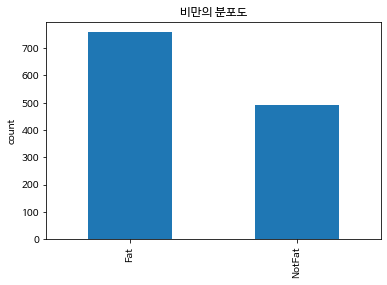

In [ ]:
#비만인 사람과 비만이 아닌 사람의 비율 알아보기
#1249명 중 비만인 사람은 758명, 비만이 아닌 사람은 491명

print(df_1['grades'].value_counts())
df_2['grades'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('비만의 분포도')
plt.show()

# Part3. 모델 적용💎

In [ ]:
#Label Encoding : 문자가 들어가있는 변수들 모두 숫자로 변환
from sklearn.preprocessing import LabelEncoder
#문자형 변수 추출
s = (df_2.dtypes == 'object')
object_cols = list(s[s].index)

print("문자형인 변수가 있는 컬럼:", object_cols)


문자형인 변수가 있는 컬럼: ['성별코드', '흡연상태', '음주여부', 'grades']


In [ ]:
#라벨인코딩 실행
LE=LabelEncoder()

for i in object_cols:
    df_2[i]=df_2[[i]].apply(LE.fit_transform)
    
print("모든 변수가 숫자형입니다!")

모든 변수가 숫자형입니다!


*   성별코드 (M : 1 / F : 0)
*   음주여부 (Yes  : 1 / No : 0)
*   흡연상태 (Yes : 2 / NotNow : 1 / No : 0)
*   grades (NotFat : 1 / Fat : 0 )

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [91]:
X = df_2.drop(['grades'], axis = 1)  # 27개 변수 
y = df_2['grades']

In [92]:
X

,시도코드,성별코드,연령대,신장,체중,허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치아우식증유무,치석
6,44,1,9,165,80,93.0,0.8,0.7,1,2,...,15.7,1.0,0.7,18.0,20.0,35.0,2,1,0.0,1.0
16,30,1,11,160,65,90.0,0.6,0.6,1,1,...,16.6,1.0,1.0,29.0,54.0,24.0,0,1,0.0,1.0
21,41,0,11,155,50,65.9,0.7,1.0,1,1,...,11.8,1.0,0.8,24.0,14.0,12.0,0,0,0.0,0.0
27,11,1,17,155,60,82.0,0.5,0.7,1,1,...,14.3,1.0,1.4,33.0,22.0,29.0,0,1,0.0,0.0
47,26,1,16,165,65,94.0,1.5,0.6,2,2,...,16.3,1.0,1.0,28.0,20.0,43.0,0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,30,1,9,180,70,87.5,1.2,0.9,1,1,...,15.1,1.0,0.9,22.0,21.0,19.0,0,1,0.0,1.0
9963,41,0,13,160,75,107.4,0.8,0.8,1,1,...,14.0,1.0,0.8,20.0,15.0,14.0,0,1,1.0,1.0
9965,45,0,12,155,60,80.0,1.5,1.0,1,1,...,13.8,1.0,0.6,22.0,9.0,29.0,0,0,0.0,0.0
9967,11,1,12,170,80,90.0,0.9,0.9,1,1,...,15.0,1.0,0.7,27.0,36.0,66.0,1,1,0.0,2.0


# 의사결정나무

In [93]:
# 데이터셋을 학습(train)과 테스트(test) 세트로 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.962


In [94]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.933
시험용 데이터 정확도: 0.917


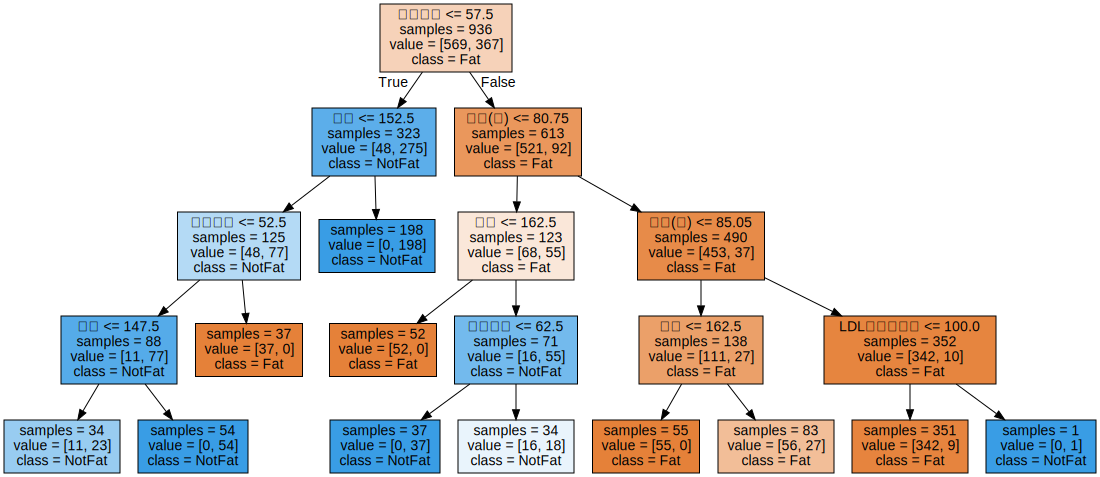

In [95]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "Fat", "NotFat"],
                feature_names=df_2.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [96]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.         0.         0.19419896 0.70980203 0.09074563
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00525338 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


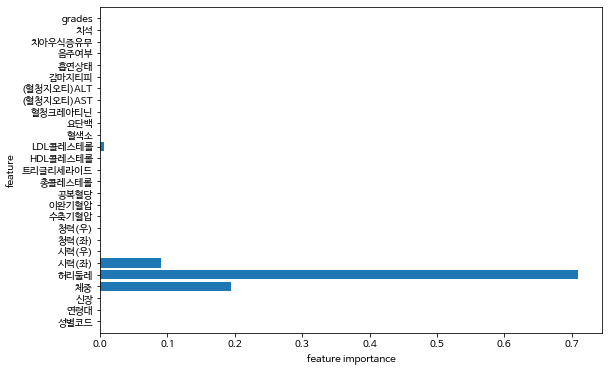

In [98]:
import numpy as np

def plot_feature_importances_df(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df_2.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df_2.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_df(tree)

In [112]:
X_train[['허리둘레','체중']]
y_train

7733    0
4559    0
3212    0
7118    0
3559    0
       ..
8470    0
8838    0
9121    0
7013    0
9077    1
Name: grades, Length: 936, dtype: int64

# 랜덤포레스트

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


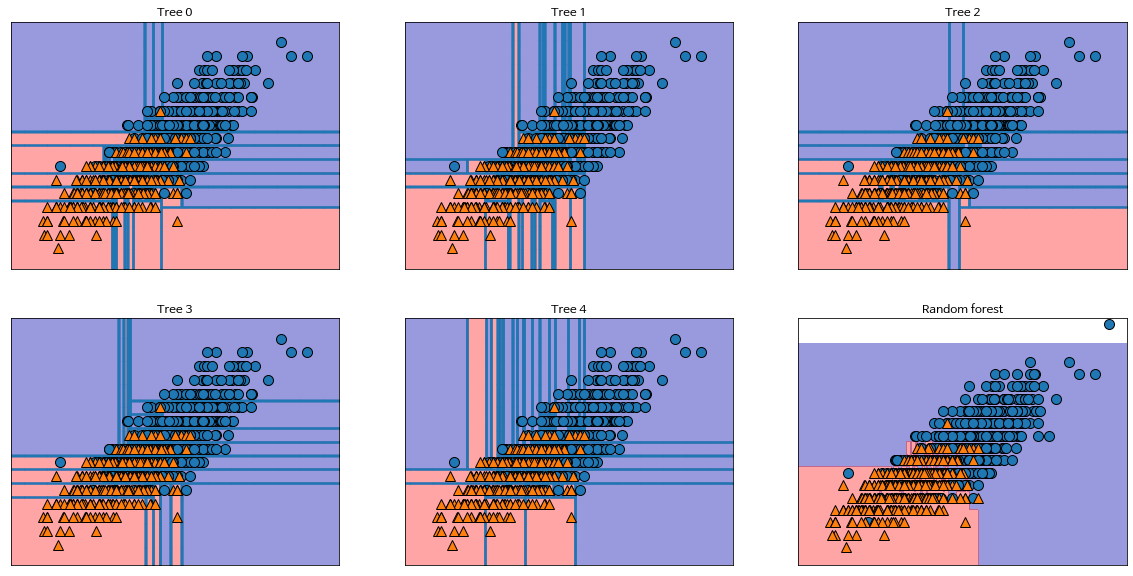

In [116]:
from sklearn.ensemble import RandomForestClassifier

# '허리둘레','체중' 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train[['허리둘레','체중']], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train[['허리둘레','체중']].values, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train[['허리둘레','체중']].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X['허리둘레'], X['체중'], y)
plt.show()

In [117]:
# 30개 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.911


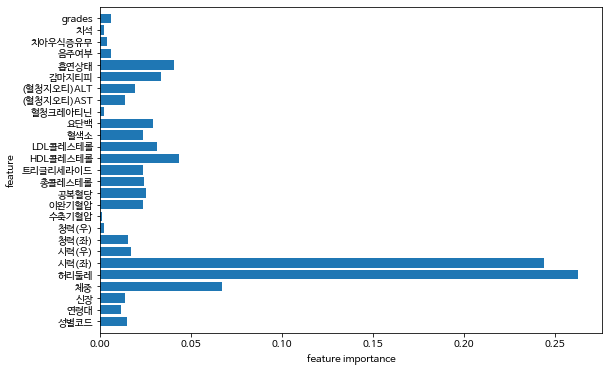

In [119]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_df(forest)

In [120]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.78723404 0.81914894 0.75531915 0.72340426 0.78723404 0.75531915
 0.83870968 0.70967742 0.79569892 0.66666667]
Random forest:  [0.96808511 0.91489362 0.90425532 0.90425532 0.94680851 0.93617021
 0.89247312 0.94623656 0.93548387 0.91397849]
Accuracy mean
Decision tree :0.764
Random forest :0.926


In [124]:
df

,decision_tree,random_forest
0,0.787234,0.968085
1,0.819149,0.914894
2,0.755319,0.904255
3,0.723404,0.904255
4,0.787234,0.946809
5,0.755319,0.936170
6,0.838710,0.892473
7,0.709677,0.946237
8,0.795699,0.935484
9,0.666667,0.913978


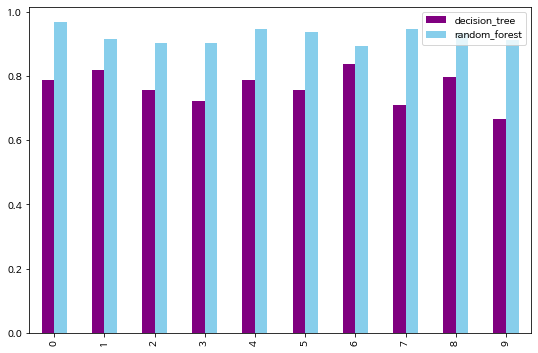

In [132]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))


df.plot(kind = 'bar', color = ['purple','skyblue'])

# 분류 모델을 통한 인사이트 도출



1.   랜덤포레스트의 정확도 (0.926) 가 의사결정나무의 정확도 (0.764) 보다 월등히 높다.
2.   허리둘레, 시력(좌), 체중순으로 비만여부에 큰 영향을 미친다
3. 그러나 시력(좌)은 데이터 외적인 인과관계 때문에 영향을 미쳤을 수도 있을 것으로 보인다.

